<a href="https://colab.research.google.com/github/Jovania/Projetos-01/blob/master/cassava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtendo o dataset

In [ ]:
!wget https://www.dropbox.com/s/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip?dl=0
!unzip -qq -n cassava-leaf-disease-classification.zip?dl=0

--2020-12-03 12:53:24--  https://www.dropbox.com/s/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.1, 2620:100:601c:1::a27d:601
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip [following]
--2020-12-03 12:53:24--  https://www.dropbox.com/s/raw/ka0bbhrdp5k2nzo/cassava-leaf-disease-classification.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4916c7a28d6616d27b8ad10446.dl.dropboxusercontent.com/cd/0/inline/BEWEgXweCPc5uaG2DsFjHYfgkiBU0QDsuwA8AHnqgMLEJBphSoJdkuqZx7h0OiD8kuSmLlMKtviAQzXkyX7ZgU9iT95z7V9UZx-KUQqY3uYNoXOq9vOWu5WOwoNlcZQGqcg/file# [following]
--2020-12-03 12:53:25--  https://uc4916c7a28d6616d27b8ad10446.dl.dropboxusercontent.com/cd/0/inline/BEWEgXweCPc5uaG2DsFjHYfgkiBU

In [ ]:
import pandas as pd

df_train = pd.read_csv("train.csv")
df_train.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


# Instalando fastai

In [ ]:
! [ -e /content ] && pip install -Uqq fastai

     |████████████████████████████████| 194kB 12.1MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 


In [ ]:
from fastai.vision.all import *

# Carregando o dataset e redimensionando

In [ ]:
dls = ImageDataLoaders.from_df(df_train, path="./train_images/", item_tfms=Resize(224))

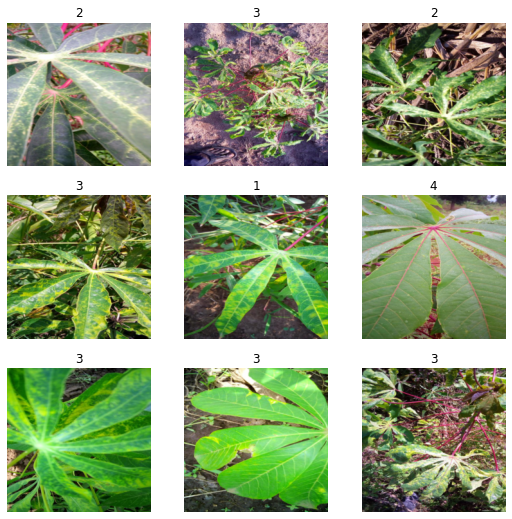

In [ ]:
dls.show_batch()

# Treinando um modelo

In [ ]:
learn = cnn_learner(dls, alexnet, metrics=[error_rate,accuracy], pretrained=False)
learn.fit(10)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.444256,1.430897,0.388175,0.611825,03:55
1,1.218034,1.127950,0.384202,0.615798,03:35
2,1.112310,1.170393,0.399159,0.600841,03:33
3,1.032136,1.021943,0.363169,0.636831,03:34
4,1.005493,1.218632,0.480486,0.519514,03:37
